In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('data/data.csv')
df = df.rename(columns={'Unnamed: 0': 'year',"Estimated Value":"target"})
df = df.set_index('year')


(888, 1397)

In [34]:
df.dropna(axis='columns',inplace=True)


In [36]:
mask = (df.iloc[:, 1:] == 0).sum(1) >= len(df.columns[1:]) / 2
df = df[~mask]

We want to drop any columns that have over 50% values as 0, as this informtation will not be valuable to us.

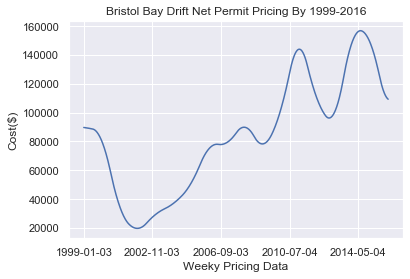

In [103]:
df['target'].plot()
plt.title("Bristol Bay Drift Net Permit Pricing By 1999-2016")
plt.ylabel("Cost($)")
plt.xlabel("Weeky Pricing Data");


This is our target variable resampled to weekly. We can see two major trends. One is 2002 there is vast drop this is due to the introduction and growing popularity of farmed salmon, as we will soon see. The other are a dip in 2012 and 2015. Overall the trend is upward. There are no new permits being issued, so it follows that as the fishery grows in value it will get more expensive to enter it being that no more permits will be issued.

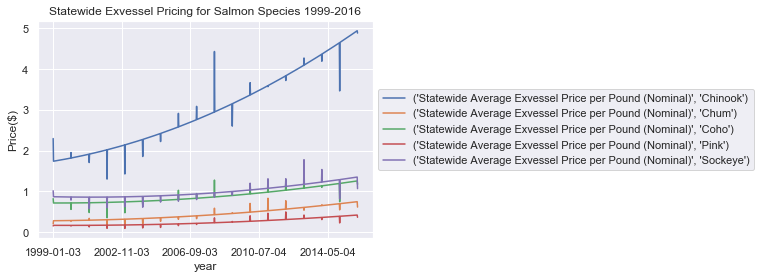

In [106]:
df[df.columns[29:34]].plot();
plt.legend(df[df.columns[29:34]], loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel("Price($)")
plt.title("Statewide Exvessel Pricing for Salmon Species 1999-2016");

After a dip in 2002 prices have remained general static for most salmon species with the exception of chinook, as lower supply has caused the price to rise dramatically.

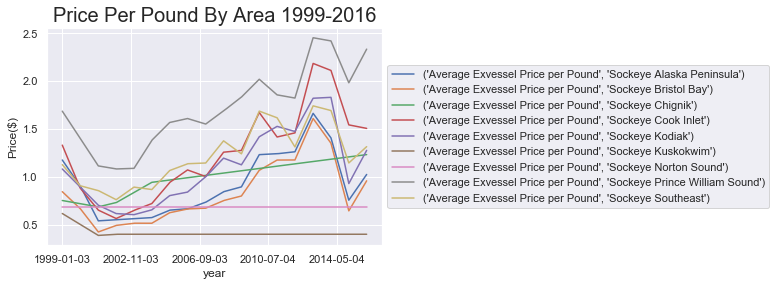

In [107]:
df[df.columns[75:84]].plot();
plt.legend(df[df.columns[75:84]], loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel("Price($)");
plt.title("Price Per Pound By Area 1999-2016",size=(20));

These fluctuations in price have carried across all the regions except chignik. Kuskowim and norton sound have remained steady,becasue these regions dont have enough volumne to reflect fluctuations in the market. The regions at the top: PW and Cook Inlet and Kodiak have seen major reductions in run volume. BB has stayed steady at 1.50$ through the last ten years 

Text(0.5, 1.0, 'Bristol Bay Salmon Products By Year')

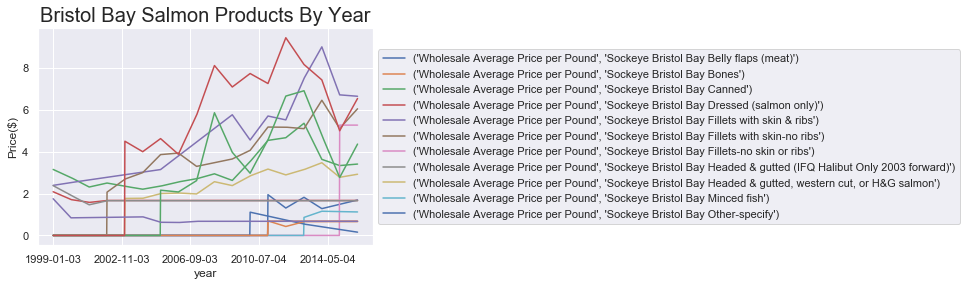

In [41]:
df[df.columns[336:351]].plot();
plt.legend(df[df.columns[336:347]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Price($)")
plt.title("Bristol Bay Salmon Products By Year",size=(20))

Dressed, no skin, fillets with skin and ribs, skin no ribs, Headed and Gutted(H&G) and canned are all the most valuable salmon products prodcued in Bristol Bay each year. This is a high end product, so the majority of the product produced will be high quality and not low quality products like fish meal or canned salmon like we would see with Chum or Pink.

In [42]:
corr_df = pd.DataFrame(df.corr()['target'])# split up over .5 correlation coefficient
strong_pos = corr_df['target'] > .3# strong positive correlation
strong_pos_corr_df = corr_df[strong_pos]
strong_pos_corr_df.drop(index = 'target',inplace=True)

/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
strong_neg = corr_df['target'] < (-.8)
strong_neg_corr_df = corr_df[strong_neg]
#strong_neg_corr_df.drop(index = 'target',inplace=True)


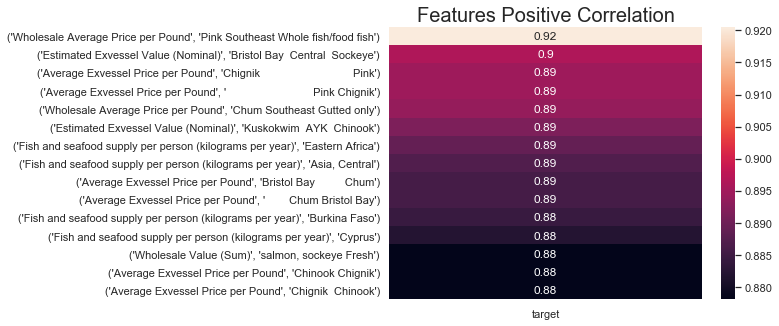

In [112]:
sns.set(style="whitegrid")# plot strong coefficient values
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap((strong_pos_corr_df.sort_values('target',ascending=False).head(15)),annot = True)
plt.title('Features Positive Correlation',{'fontsize': 20});


The number one and two most correlated features to the target are pink salmon southeast, this is the most numerous fish species and the product that we are directly discussing, BB Central Sockeye. Then the next two are Chignik Pricing, this is the region most geographically close to Bristol Bay. Another is Kuskokwim another region directly next to Bristol Bay. It follows that the permit pricing would be correlated to these regions. As for the appearance of Burkina Faso and Cyprus I cannot account for this. Asia Central is where the majority of seafood is produced so it follows that it would be correlated and also a lot of the fish is exported to these regions making them directly related as well. 

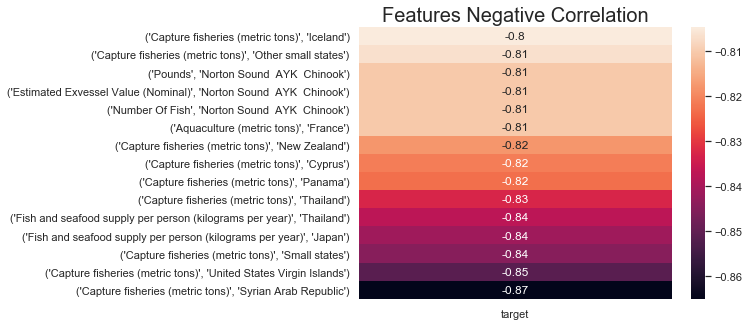

In [113]:
sns.set(style="darkgrid")# plot strong coefficient values
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap((strong_neg_corr_df.sort_values('target',ascending=False).head(15)),annot = True)
plt.title('Features Negative Correlation',{'fontsize': 20});



The high negative correlation attributed to these high volume producing countries could be competitors to BB Salmon. For example, Japan sources a lot of salmon from Alaska. The Appearance of Norton Salmon Chinook as a high negative factor could related to competition between those permits and our BB permits. These values have also gone down as BB salmon numnbers have gone up.


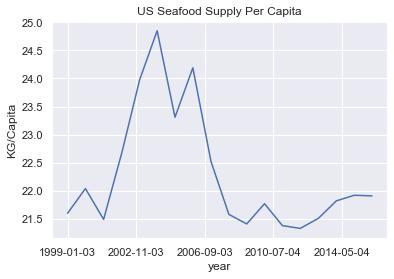

In [46]:
df[df.columns[608]].plot()
plt.title("US Seafood Supply Per Capita")
plt.ylabel("KG/Capita");

Interesting note about U.S seafood production, it peaked in 2002 and has been trending down ever since.

Text(0.5, 1.0, 'Top Seafood Producers per Capita')

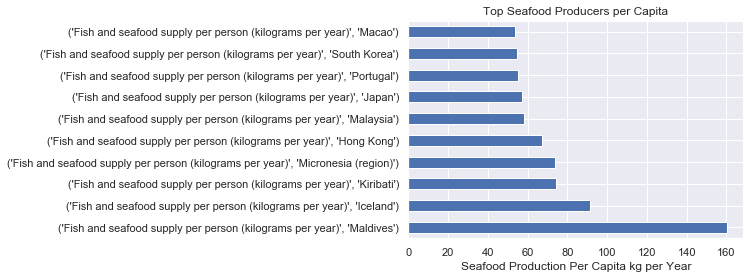

In [47]:
food_supply = df[df.columns[410:621]]
mean_food = food_supply.mean()
mean_food.sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel("Seafood Production Per Capita kg per Year")
plt.title("Top Seafood Producers per Capita")

The majority of major seafood producers are mostly in Asia and that could explain the high degree of correlation that we found. Iceland in particular could be explained as a highly correlated factor.

Text(0.5, 1.0, 'Aquaculture Metric Tons')

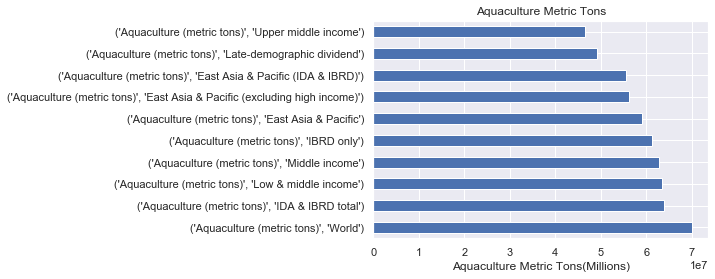

In [48]:
fish_farming = df[df.columns[621:841]]
mean_farm = fish_farming.mean()
mean_farm.sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel("Aquaculture Metric Tons(Millions)")
plt.title("Aquaculture Metric Tons")

These aqualculture numbers are not really helpful in understanding which countries are dominating aquaculture, but we can see that the industry is centered in Asia, in low to middle income countries, and is on the rise.

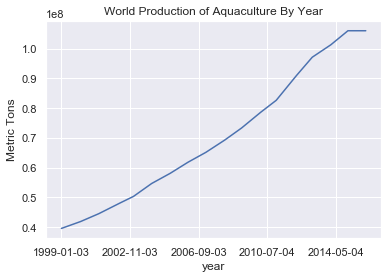

In [49]:
df[df.columns[837]].plot()
plt.title("World Production of Aquaculture By Year")
plt.ylabel("Metric Tons");

Aqualculture emrges as a serious competitor to wild salmon around 2002 and this explains the extreme dip in wild salmon pricing and value around that time

Text(0.5, 1.0, 'Fishing Metric Tons')

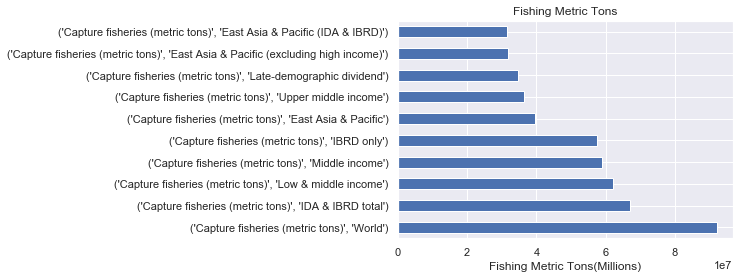

In [50]:
mean_fish = df[df.columns[841:1097]]
mean_fish = mean_fish.mean()
mean_fish.sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel("Fishing Metric Tons(Millions)")
plt.title("Fishing Metric Tons")

it is the same countries and regions that dominate in aquaculture that also have strong capture fishery cultures

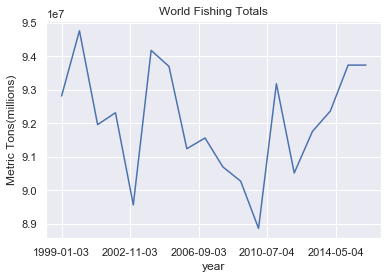

In [51]:
df[df.columns[1093]].plot()
plt.title("World Fishing Totals")
plt.ylabel("Metric Tons(millions)");


The world fishing totals hs experienced major dips but has remained steady over the last twenty years. These general dips have not had a direct effect on BB salmon permit pricing. The 2002 dip is reflected here and the recent rising trend is also reflected.

Text(0.5, 1.0, 'Processing Companies By Sockeye Product')

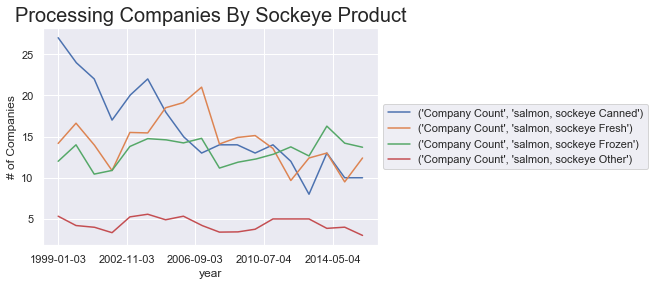

In [52]:
df[df.columns[1113:1117]].plot();
plt.legend(df[df.columns[1113:1117]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("# of Companies")
plt.title("Processing Companies By Sockeye Product",size=(20))

Has competition in the industry effected pricing. In fact consolidation in the last ten years apears to have strengthened it. Fresh Salmon is ascendent, canned is going down in popularity because it is becoming a premium product and a lot of the post production is now done ion Asia and products are reexported back to the U.S and the E.U

Text(0.5, 1.0, 'Net Weight for Sockeye Product AK')

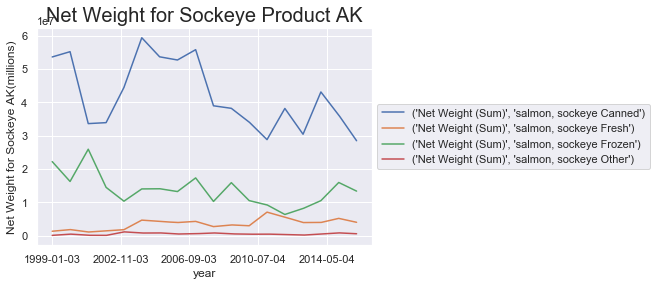

In [71]:
df[df.columns[1133:1137]].plot();
plt.legend(df[df.columns[1133:1137]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Net Weight for Sockeye AK(millions)")
plt.title("Net Weight for Sockeye Product AK",size=(20))

Canned Salmon is trending down, while frozen has remained static. The BB industry is moving toward fresh and frozen and away from canned as we move into the future.

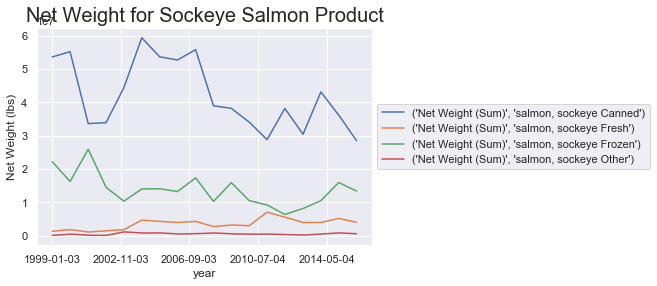

In [126]:
df[df.columns[1133:1137]].plot()
plt.legend(df[df.columns[1133:1137]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Net Weight (lbs)")
plt.title("Net Weight for Sockeye Salmon Product",size=(20));

Canned BB sockeye dominates but is trending down in net weight as frozen rises.

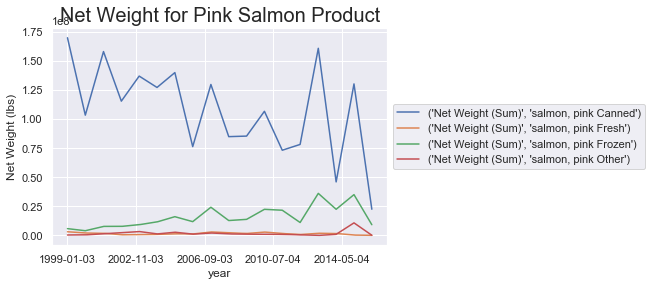

In [131]:
df[df.columns[1129:1133]].plot()
plt.legend(df[df.columns[1129:1133]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Net Weight (lbs)")
plt.title("Net Weight for Pink Salmon Product",size=(20));

Pink net weight is trending downward on all fronts

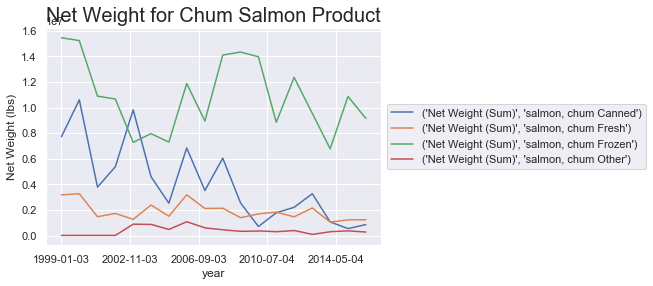

In [136]:
df[df.columns[1121:1125]].plot()
plt.legend(df[df.columns[1121:1125]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Net Weight (lbs)")
plt.title("Net Weight for Chum Salmon Product",size=(20));

Chum salmon is trending down as well.

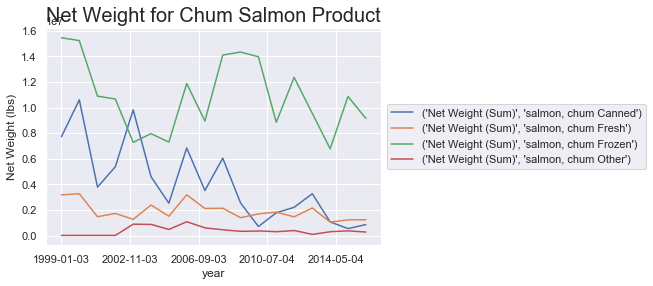

In [139]:
df[df.columns[1121:1125]].plot()
plt.legend(df[df.columns[1121:1125]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Net Weight (lbs)")
plt.title("Net Weight for Chum Salmon Product",size=(20));

Text(0.5, 1.0, 'Net Weight Chinook')

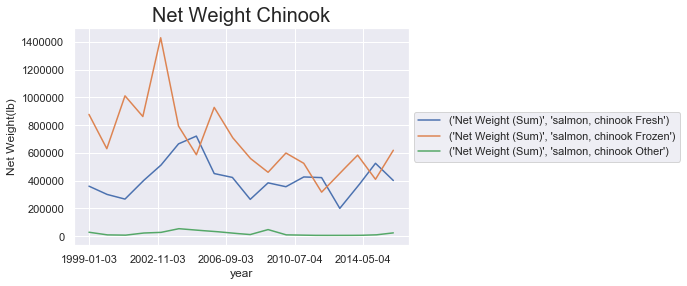

In [142]:
df[df.columns[1118:1121]].plot()
plt.legend(df[df.columns[1118:111120]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Net Weight(lb)")
plt.title("Net Weight Chinook",size=(20))

The net weight for chinook has gone down dramatically since the year 2000. with frozen and fresh becoming equal. This is because fresh chinook is a premium product and as the total amount of chinook available goes down the more of it will put toward fresh. 

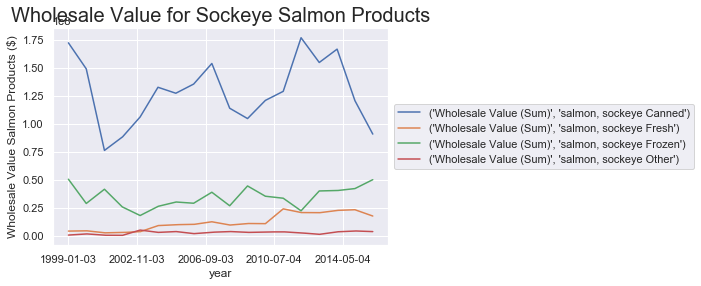

In [145]:

df[df.columns[1153:1157]].plot()
plt.legend(df[df.columns[1153:1157]], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Wholesale Value Salmon Products ($)")
plt.title("Wholesale Value for Sockeye Salmon Products",size=(20));

The value for canned  sockeye is going down as wild salmon becomes a premium product

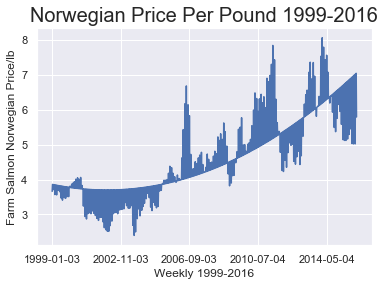

In [101]:
df['farm_salmon_price'].plot()
plt.ylabel("Farm Salmon Norwegian Price/lb")
plt.xlabel("Weekly 1999-2016")
plt.title("Norwegian Price Per Pound 1999-2016",size=(20));


The value of Norwegian Salmon has gone up dramatically in concert with wild salmon 

Text(0.5, 1.0, 'Top (Salmon Ex Vessel Value) Regions ($)')

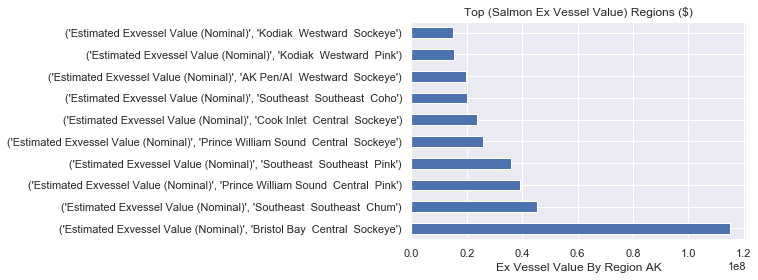

In [56]:
top_regions = df[df.columns[1157:1211]]
mean = top_regions.mean()
mean.sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel("Ex Vessel Value By Region AK")
plt.title("Top (Salmon Ex Vessel Value) Regions ($)")

Average ex vessel value for salmon species by region. BB sockeye is on top by a wide margin. With an average value 1.2 dollars per lb. The total exvessel value was 306 million for 2019. BB dominates the industry. In fact, 40% of the worlds sockeye comes from Bristol Bay

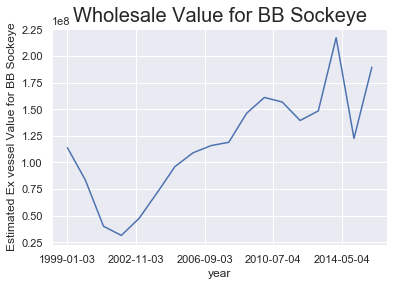

In [146]:
df[df.columns[1166]].plot()
plt.ylabel("Estimated Ex vessel Value for BB Sockeye")
plt.title("Wholesale Value for BB Sockeye",size=(20));

After the industry slump in 2002, the value has risen and permits to enter the fshery have risen accordingly.

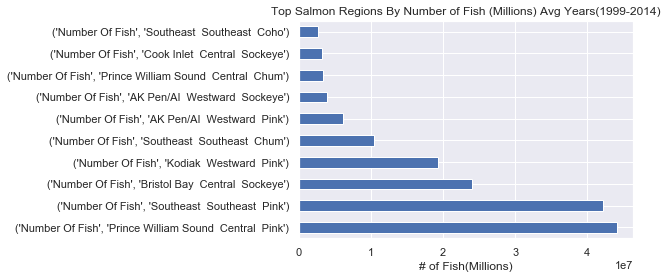

In [58]:
top_regions = df[df.columns[1211:1265]]
mean = top_regions.mean()
mean.sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel("# of Fish(Millions)")
plt.title("Top Salmon Regions By Number of Fish (Millions) Avg Years(1999-2014)");

Pinks dominates in terms of numbers but not in value. However, BB sockeye has the numbers as well coming in at #3 

Text(0.5, 1.0, '# of Returning BB Sockeye 1999-2014')

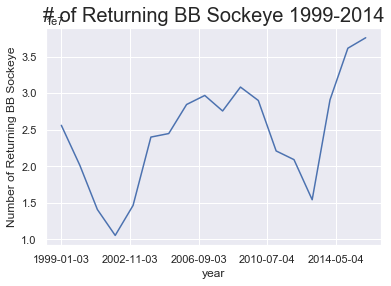

In [59]:
df[df.columns[1220]].plot()
plt.ylabel("Number of Returning BB Sockeye")
plt.title("# of Returning BB Sockeye 1999-2014",size=(20))

The number of fish returning to BB dropped in 2002 contributing to the slump in permit pricing, the permit slump in 2014 could also be a reflection of this slump that we see here.

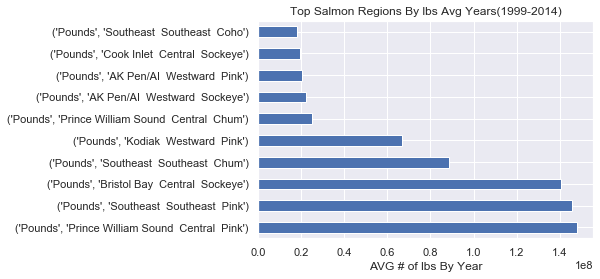

In [148]:




top_regions = df[df.columns[1265:1319]]
mean = top_regions.mean()
mean.sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel("AVG # of lbs By Year")
plt.title("Top Salmon Regions By lbs Avg Years(1999-2014)");

Southeast and PWS Pinks lead in poundage, no surprises there.

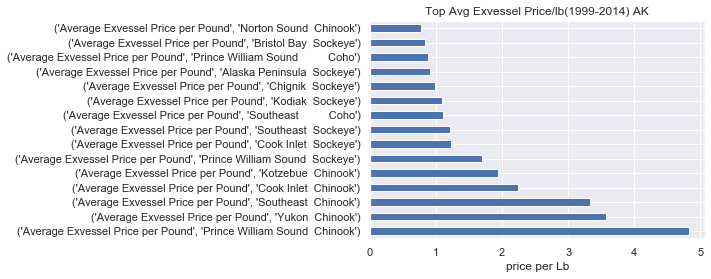

In [62]:
top_regions = df[df.columns[1319:]]
mean = top_regions.mean()
mean.sort_values(ascending=False).head(15).plot(kind='barh')
plt.xlabel("price per Lb")
plt.title("Top Avg Exvessel Price/lb(1999-2014) AK");

No surprises, Chinook dominates, this is the premium product. Also low supply of kodiak, Chignik, and Peninsula sockeye makes these priced higher than BB.

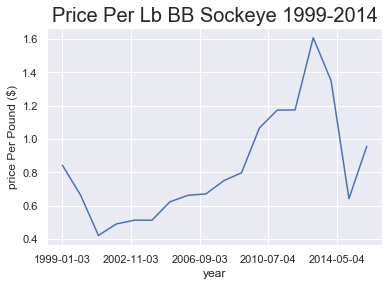

In [149]:
df[df.columns[1328]].plot()
plt.ylabel("price Per Pound ($)")
plt.title("Price Per Lb BB Sockeye 1999-2014",size=(20));

This mimics the price of the permit. Drop in 2002, high in 2013 and then a drop in 2013 caused by major low 

In [64]:
df.to_csv("df_clean.csv")